# Distribution Comparison: Full Spill vs NuONE

This notebook compares the distributions of various cut variables between full_spill and nuone datasets.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Data directory
data_dir = './data'

print(f"Loading data from {data_dir}")

Loading data from ./data


## Cut Parameters Configuration

In [5]:
# ============================================================================
# Cut Parameters
# ============================================================================

# ============================================================================
# Cut Enable/Disable Switches
# ============================================================================
ENABLE_TOPOLOGY_CUT = True
ENABLE_FIDUCIAL_CUT = True
ENABLE_ANGLE_CUT = True
ENABLE_DEDX_CUT = True
ENABLE_ETHETA2_CUT = True
ENABLE_KE_CUT = True
ENABLE_PCA_CUT = True
ENABLE_PROXIMITY_CUT = True

# ============================================================================
# Cut Parameter Values
# ============================================================================

# Angle cut: maximum angle between particle and beam direction (degrees)
ANGLE_CUT_MAX = 7.0  # degrees

# Reco topology cut: allowed reconstruction topology types
RECO_TOPOLOGY_ALLOWED = ['1e', '1g']

# dE/dx cut: allowed range for initial dE/dx (MeV/cm)
DEDX_CUT_MIN = -1.2   # MeV/cm
DEDX_CUT_MAX = 2.5   # MeV/cm

# Eθ² cut: maximum value of kinetic energy × angle squared (MeV·rad²)
ETHETA2_CUT_MAX = 3.0  # MeV·rad²

# KE cut: minimum particle kinetic energy (MeV)
KE_CUT_MIN = 150.0  # MeV

# Fiducial volume margin (cm)
MARGIN_MODULE = 1.5  # cm
MARGIN_DETECTOR = 5.0  # cm

# DELTA_D cut: angular spread. Not in use.
DELTA_D_CUT_MAX = 999999999999
DELTA_D_CUT_MIN = -999999999999

"""PCA Cuts:"""
# PCA axis 1 wrt beam direction. Not in use (prefer start_dir angle cut).
PCA_PC1_ANGLE_MAX = 99999999999  # degrees

# Longitudinal spread (sqrt(λ1)) range
PCA_LONGITUDINAL_MIN = -2      # cm
PCA_LONGITUDINAL_MAX = 99960      # cm

# Major transverse spread (sqrt(λ2)/sqrt(λ1)) range
PCA_TRANSVERSE_MAJOR_MIN = 0.04      
PCA_TRANSVERSE_MAJOR_MAX = 9990.4      

# Minor transverse spread (sqrt(λ3)/sqrt(λ1)) range
PCA_TRANSVERSE_MINOR_MIN = 0.02      
PCA_TRANSVERSE_MINOR_MAX = 9990.2

# Distance threshold (cm)
PROXIMITY_DISTANCE_THRESHOLD = 0.5


print("=" * 60)
print("Cut Parameters Configuration")
print("=" * 60)
print("\nCut Switches:")
print(f"  Topology Cut: {'ENABLED' if ENABLE_TOPOLOGY_CUT else 'DISABLED'}")
print(f"  Fiducial Volume Cut: {'ENABLED' if ENABLE_FIDUCIAL_CUT else 'DISABLED'}")
print(f"  Angle Cut: {'ENABLED' if ENABLE_ANGLE_CUT else 'DISABLED'}")
print(f"  dE/dx Cut: {'ENABLED' if ENABLE_DEDX_CUT else 'DISABLED'}")
print(f"  Eθ² Cut: {'ENABLED' if ENABLE_ETHETA2_CUT else 'DISABLED'}")
print(f"  KE Cut: {'ENABLED' if ENABLE_KE_CUT else 'DISABLED'}")
print(f"  PCA Cut: {'ENABLED' if ENABLE_PCA_CUT else 'DISABLED'}")
print(f"  Proximity Cut: {'ENABLED' if ENABLE_PROXIMITY_CUT else 'DISABLED'}")
print("\nCut Parameter Values:")
print(f"  Angle cut: < {ANGLE_CUT_MAX}°")
print(f"  Reco topology: {RECO_TOPOLOGY_ALLOWED}")
print(f"  dE/dx range: [{DEDX_CUT_MIN}, {DEDX_CUT_MAX}] MeV/cm")
print(f"  Eθ² cut: < {ETHETA2_CUT_MAX} MeV·rad²")
print(f"  KE cut: > {KE_CUT_MIN} MeV")
print(f"  DELTA_D cut: [{DELTA_D_CUT_MIN}, {DELTA_D_CUT_MAX}] (Not in use)")
print(f"\nPCA Cuts:")
print(f"  PC1 angle: < {PCA_PC1_ANGLE_MAX}° (Not in use)")
print(f"  Longitudinal sqrt(λ1): [{PCA_LONGITUDINAL_MIN}, {PCA_LONGITUDINAL_MAX}] cm")
print(f"  Transverse major sqrt(λ2)/sqrt(λ1): [{PCA_TRANSVERSE_MAJOR_MIN}, {PCA_TRANSVERSE_MAJOR_MAX}]")
print(f"  Transverse minor sqrt(λ3)/sqrt(λ1): [{PCA_TRANSVERSE_MINOR_MIN}, {PCA_TRANSVERSE_MINOR_MAX}]")
print(f"\nProximity Cut:")
print(f"  Distance threshold: {PROXIMITY_DISTANCE_THRESHOLD} cm")
print("=" * 60)

Cut Parameters Configuration

Cut Switches:
  Topology Cut: ENABLED
  Fiducial Volume Cut: ENABLED
  Angle Cut: ENABLED
  dE/dx Cut: ENABLED
  Eθ² Cut: ENABLED
  KE Cut: ENABLED
  PCA Cut: ENABLED
  Proximity Cut: ENABLED

Cut Parameter Values:
  Angle cut: < 7.0°
  Reco topology: ['1e', '1g']
  dE/dx range: [-1.2, 2.5] MeV/cm
  Eθ² cut: < 3.0 MeV·rad²
  KE cut: > 150.0 MeV
  DELTA_D cut: [-999999999999, 999999999999] (Not in use)

PCA Cuts:
  PC1 angle: < 99999999999° (Not in use)
  Longitudinal sqrt(λ1): [-2, 99960] cm
  Transverse major sqrt(λ2)/sqrt(λ1): [0.04, 9990.4]
  Transverse minor sqrt(λ3)/sqrt(λ1): [0.02, 9990.2]

Proximity Cut:
  Distance threshold: 0.5 cm


## Cut 3: Angle Distribution Comparison

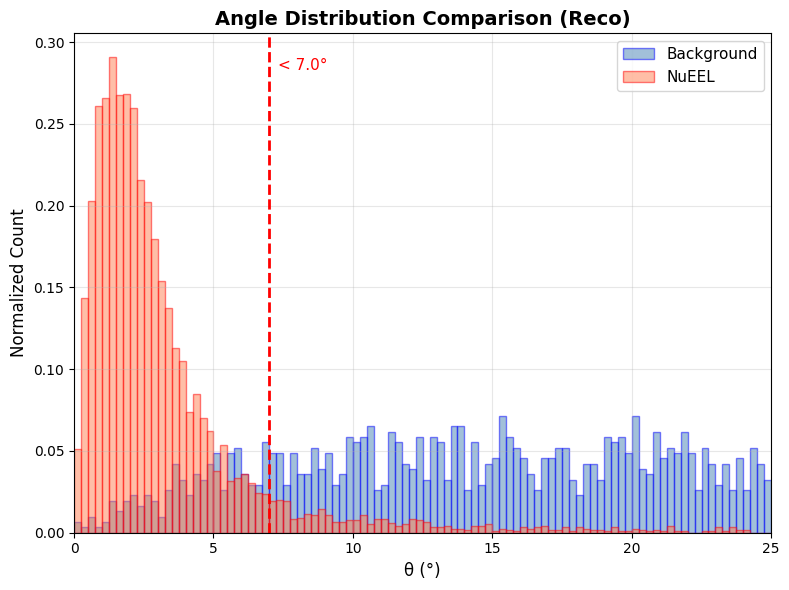

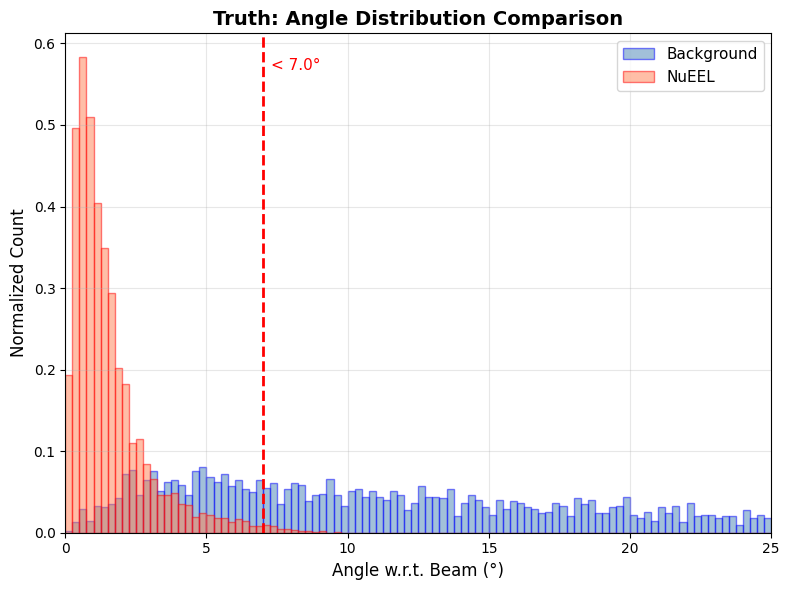

ANGLE DISTRIBUTION STATISTICS

Reco - Full Spill: n=3926
  Mean: 54.81°, Median: 42.44°, Std: 42.47°

Reco - NuONE: n=4863
  Mean: 4.16°, Median: 2.28°, Std: 9.14°

Truth - Full Spill: n=3936
  Mean: 33.08°, Median: 20.64°, Std: 34.45°

Truth - NuONE: n=4863
  Mean: 1.55°, Median: 1.13°, Std: 1.39°


In [6]:
# Load angle data
angle_full_reco = pd.read_csv(f'{data_dir}/full_spill_angle_reco.csv')['angle_reco'].values
angle_full_truth = pd.read_csv(f'{data_dir}/full_spill_angle_truth.csv')['angle_truth'].values
angle_nuone_reco = pd.read_csv(f'{data_dir}/nuone_angle_reco.csv')['angle_reco'].values
angle_nuone_truth = pd.read_csv(f'{data_dir}/nuone_angle_truth.csv')['angle_truth'].values

# Create comparison plots
# Reco comparison
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.hist(angle_full_reco, bins=100, range=(0, 25), alpha=0.5, density=True,
        color='steelblue', label='Background', edgecolor='blue')
ax.hist(angle_nuone_reco, bins=100, range=(0, 25), alpha=0.5, density=True,
        color='coral', label='NuEEL', edgecolor='red')
ax.axvline(ANGLE_CUT_MAX, color='red', linestyle='--', linewidth=2)
ax.text(ANGLE_CUT_MAX + 0.3, ax.get_ylim()[1] * 0.95, f'< {ANGLE_CUT_MAX}°', 
        color='red', fontsize=11, verticalalignment='top')
ax.set_xlabel('θ (°)', fontsize=12)
ax.set_ylabel('Normalized Count', fontsize=12)
ax.set_title('Angle Distribution Comparison (Reco)', fontsize=14, fontweight='bold')
ax.set_xlim(0, 25)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Truth comparison
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.hist(angle_full_truth, bins=100, range=(0, 25), alpha=0.5, density=True,
        color='steelblue', label='Background', edgecolor='blue')
ax.hist(angle_nuone_truth, bins=100, range=(0, 25), alpha=0.5, density=True,
        color='coral', label='NuEEL', edgecolor='red')
ax.axvline(ANGLE_CUT_MAX, color='red', linestyle='--', linewidth=2)
ax.text(ANGLE_CUT_MAX + 0.3, ax.get_ylim()[1] * 0.95, f'< {ANGLE_CUT_MAX}°', 
        color='red', fontsize=11, verticalalignment='top')
ax.set_xlabel('Angle w.r.t. Beam (°)', fontsize=12)
ax.set_ylabel('Normalized Count', fontsize=12)
ax.set_title('Truth: Angle Distribution Comparison', fontsize=14, fontweight='bold')
ax.set_xlim(0, 25)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print statistics
print("=" * 80)
print("ANGLE DISTRIBUTION STATISTICS")
print("=" * 80)
print(f"\nReco - Full Spill: n={len(angle_full_reco)}")
print(f"  Mean: {np.mean(angle_full_reco):.2f}°, Median: {np.median(angle_full_reco):.2f}°, Std: {np.std(angle_full_reco):.2f}°")
print(f"\nReco - NuONE: n={len(angle_nuone_reco)}")
print(f"  Mean: {np.mean(angle_nuone_reco):.2f}°, Median: {np.median(angle_nuone_reco):.2f}°, Std: {np.std(angle_nuone_reco):.2f}°")
print(f"\nTruth - Full Spill: n={len(angle_full_truth)}")
print(f"  Mean: {np.mean(angle_full_truth):.2f}°, Median: {np.median(angle_full_truth):.2f}°, Std: {np.std(angle_full_truth):.2f}°")
print(f"\nTruth - NuONE: n={len(angle_nuone_truth)}")

print(f"  Mean: {np.mean(angle_nuone_truth):.2f}°, Median: {np.median(angle_nuone_truth):.2f}°, Std: {np.std(angle_nuone_truth):.2f}°")
print("=" * 80)


## Cut 4: dE/dx Distribution Comparison

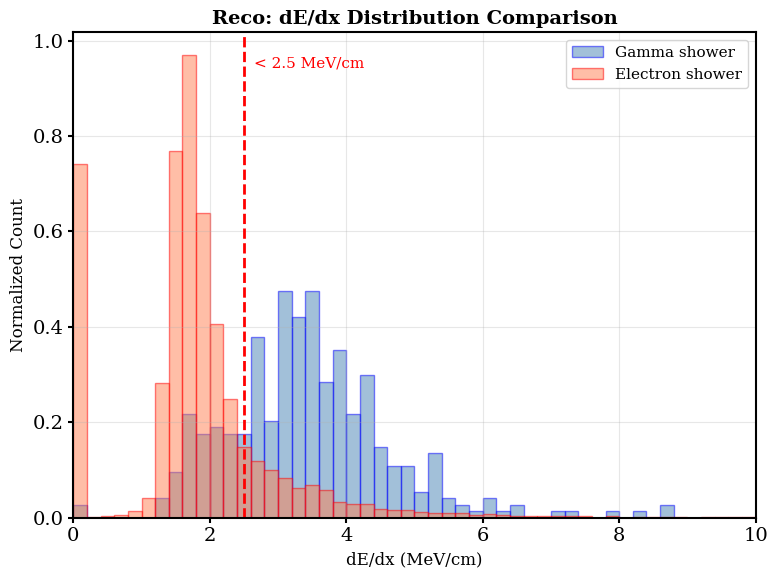

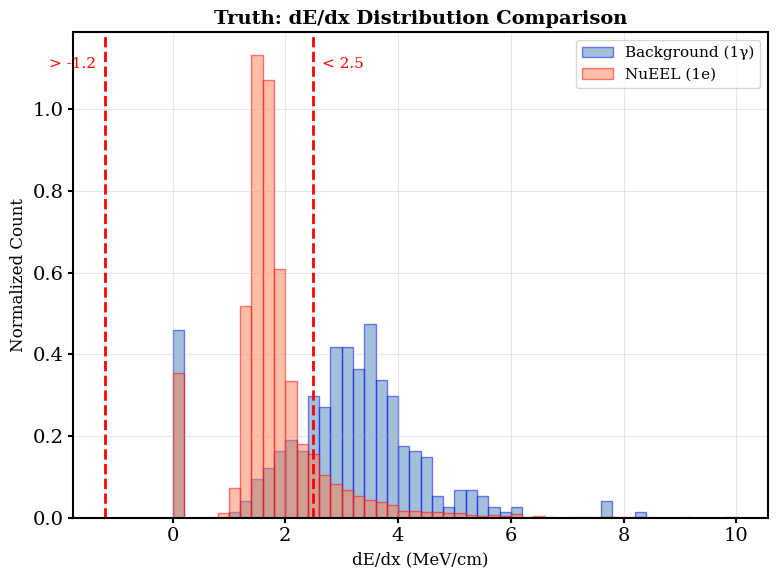

dE/dx DISTRIBUTION STATISTICS

Reco - Full Spill 1g: n=371
  Mean: 3.50 MeV/cm, Median: 3.39 MeV/cm, Std: 1.47 MeV/cm

Reco - NuONE 1e: n=6067
  Mean: 1.88 MeV/cm, Median: 1.73 MeV/cm, Std: 1.98 MeV/cm
  Mean: 1.89 MeV/cm, Median: 1.67 MeV/cm, Std: 1.80 MeV/cm

Truth - Full Spill 1g: n=371

Truth - NuONE 1e: n=6067
  Mean: 3.05 MeV/cm, Median: 3.16 MeV/cm, Std: 1.58 MeV/cm


In [17]:
# Load dE/dx data
# Note: Full spill uses 1g topology, NuONE uses 1e topology
dedx_full_reco = pd.read_csv(f'{data_dir}/full_spill_dedx_reco_1g.csv')['dedx_reco'].values
dedx_full_truth = pd.read_csv(f'{data_dir}/full_spill_dedx_truth_1g.csv')['dedx_truth'].values
dedx_nuone_reco = pd.read_csv(f'{data_dir}/nuone_dedx_reco_1e.csv')['dedx_reco'].values
dedx_nuone_truth = pd.read_csv(f'{data_dir}/nuone_dedx_truth_1e.csv')['dedx_truth'].values

# Create comparison plots
# Reco comparison
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.hist(dedx_full_reco, bins=50, range=(0, 10), alpha=0.5, density=True,
        color='steelblue', label='Gamma shower', edgecolor='blue')
ax.hist(dedx_nuone_reco, bins=50, range=(0, 10), alpha=0.5, density=True,
        color='coral', label='Electron shower', edgecolor='red')
#ax.axvline(DEDX_CUT_MIN, color='red', linestyle='--', linewidth=2)
ax.axvline(DEDX_CUT_MAX, color='red', linestyle='--', linewidth=2)
#ax.text(DEDX_CUT_MIN - 0.15, ax.get_ylim()[1] * 0.95, f'> {DEDX_CUT_MIN}', 
        #color='red', fontsize=11, verticalalignment='top', horizontalalignment='right')
ax.text(DEDX_CUT_MAX + 0.15, ax.get_ylim()[1] * 0.95, f'< {DEDX_CUT_MAX} MeV/cm', 
        color='red', fontsize=11, verticalalignment='top')
ax.set_xlabel('dE/dx (MeV/cm)', fontsize=12)
ax.set_ylabel('Normalized Count', fontsize=12)
ax.set_title('Reco: dE/dx Distribution Comparison', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.set_xlim(0, 10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Truth comparison
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.hist(dedx_full_truth, bins=50, range=(0, 10), alpha=0.5, density=True,
        color='steelblue', label='Background (1γ)', edgecolor='blue')
ax.hist(dedx_nuone_truth, bins=50, range=(0, 10), alpha=0.5, density=True,
        color='coral', label='NuEEL (1e)', edgecolor='red')
ax.axvline(DEDX_CUT_MIN, color='red', linestyle='--', linewidth=2)
ax.axvline(DEDX_CUT_MAX, color='red', linestyle='--', linewidth=2)
ax.text(DEDX_CUT_MIN - 0.15, ax.get_ylim()[1] * 0.95, f'> {DEDX_CUT_MIN}', 
        color='red', fontsize=11, verticalalignment='top', horizontalalignment='right')
ax.text(DEDX_CUT_MAX + 0.15, ax.get_ylim()[1] * 0.95, f'< {DEDX_CUT_MAX}', 
        color='red', fontsize=11, verticalalignment='top')
ax.set_xlabel('dE/dx (MeV/cm)', fontsize=12)
ax.set_ylabel('Normalized Count', fontsize=12)
ax.set_title('Truth: dE/dx Distribution Comparison', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print statistics
print("=" * 80)
print("dE/dx DISTRIBUTION STATISTICS")
print("=" * 80)
print(f"\nReco - Full Spill 1g: n={len(dedx_full_reco)}")
print(f"  Mean: {np.mean(dedx_full_reco):.2f} MeV/cm, Median: {np.median(dedx_full_reco):.2f} MeV/cm, Std: {np.std(dedx_full_reco):.2f} MeV/cm")

print(f"\nReco - NuONE 1e: n={len(dedx_nuone_reco)}")
print("=" * 80)

print(f"  Mean: {np.mean(dedx_nuone_reco):.2f} MeV/cm, Median: {np.median(dedx_nuone_reco):.2f} MeV/cm, Std: {np.std(dedx_nuone_reco):.2f} MeV/cm")
print(f"  Mean: {np.mean(dedx_nuone_truth):.2f} MeV/cm, Median: {np.median(dedx_nuone_truth):.2f} MeV/cm, Std: {np.std(dedx_nuone_truth):.2f} MeV/cm")

print(f"\nTruth - Full Spill 1g: n={len(dedx_full_truth)}")
print(f"\nTruth - NuONE 1e: n={len(dedx_nuone_truth)}")
print(f"  Mean: {np.mean(dedx_full_truth):.2f} MeV/cm, Median: {np.median(dedx_full_truth):.2f} MeV/cm, Std: {np.std(dedx_full_truth):.2f} MeV/cm")

## Cut 5: Eθ² Distribution Comparison

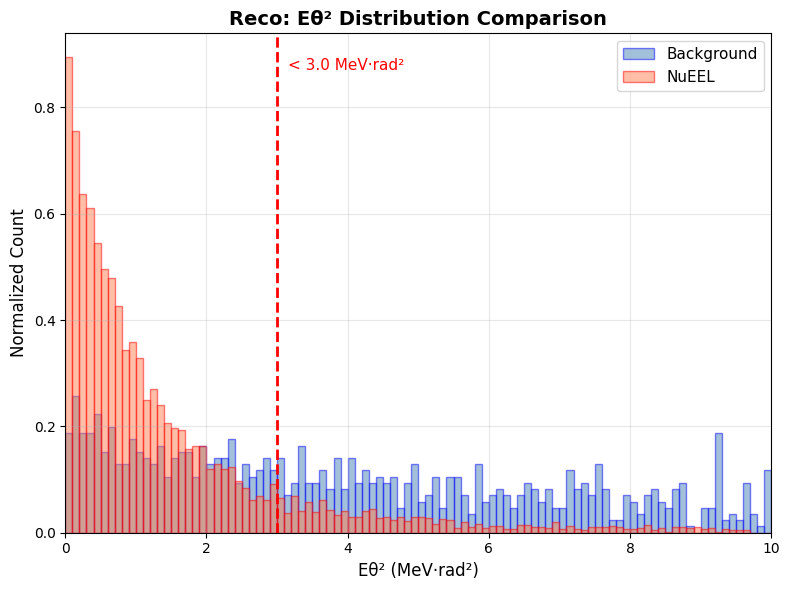

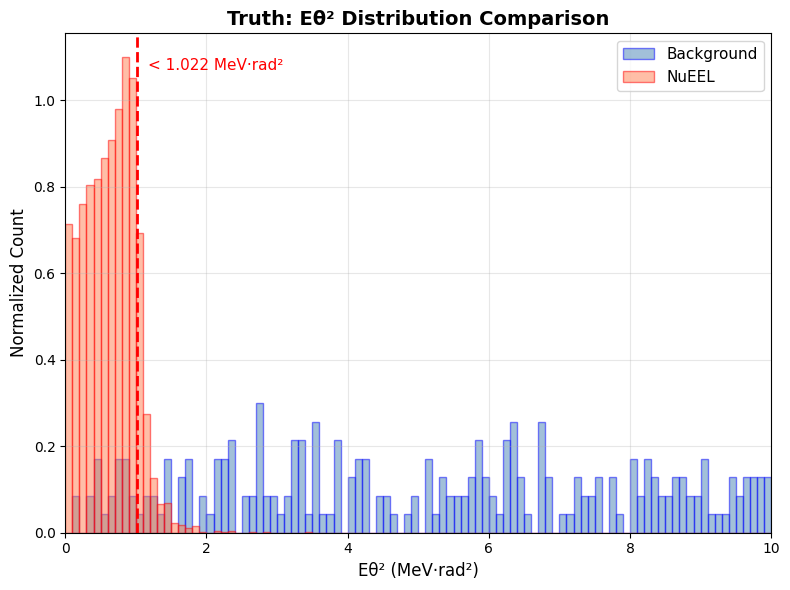

Eθ² DISTRIBUTION STATISTICS

Reco - Full Spill: n=3926
  Mean: 189.70 MeV·rad², Median: 58.11 MeV·rad², Std: 905.03 MeV·rad²

Reco - NuONE: n=4863
  Mean: 30.25 MeV·rad², Median: 0.92 MeV·rad², Std: 524.20 MeV·rad²

Truth - Full Spill: n=3936
  Mean: 210.91 MeV·rad², Median: 123.04 MeV·rad², Std: 249.79 MeV·rad²

Truth - NuONE: n=4863
  Mean: 0.63 MeV·rad², Median: 0.64 MeV·rad², Std: 0.35 MeV·rad²


In [8]:
# Load Eθ² data
etheta2_full_reco = pd.read_csv(f'{data_dir}/full_spill_etheta2_reco.csv')['etheta2_reco'].values
etheta2_full_truth = pd.read_csv(f'{data_dir}/full_spill_etheta2_truth.csv')['etheta2_truth'].values
etheta2_nuone_reco = pd.read_csv(f'{data_dir}/nuone_etheta2_reco.csv')['etheta2_reco'].values
etheta2_nuone_truth = pd.read_csv(f'{data_dir}/nuone_etheta2_truth.csv')['etheta2_truth'].values

# Create comparison plots
# Reco comparison
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.hist(etheta2_full_reco, bins=100, range=(0, 10), alpha=0.5, density=True,
        color='steelblue', label='Background', edgecolor='blue')
ax.hist(etheta2_nuone_reco, bins=100, range=(0, 10), alpha=0.5, density=True,
        color='coral', label='NuEEL', edgecolor='red')
ax.axvline(ETHETA2_CUT_MAX, color='red', linestyle='--', linewidth=2)
ax.text(ETHETA2_CUT_MAX + 0.15, ax.get_ylim()[1] * 0.95, f'< {ETHETA2_CUT_MAX} MeV·rad²', 
        color='red', fontsize=11, verticalalignment='top')
ax.set_xlabel('Eθ² (MeV·rad²)', fontsize=12)
ax.set_ylabel('Normalized Count', fontsize=12)
ax.set_title('Reco: Eθ² Distribution Comparison', fontsize=14, fontweight='bold')
ax.set_xlim(0, 10)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Truth comparison
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.hist(etheta2_full_truth, bins=100, range=(0, 10), alpha=0.5, density=True,
        color='steelblue', label='Background', edgecolor='blue')
ax.hist(etheta2_nuone_truth, bins=100, range=(0, 10), alpha=0.5, density=True,
        color='coral', label='NuEEL', edgecolor='red')
ax.axvline(1.022, color='red', linestyle='--', linewidth=2)
ax.text(1.022 + 0.15, ax.get_ylim()[1] * 0.95, f'< 1.022 MeV·rad²', 
        color='red', fontsize=11, verticalalignment='top')
ax.set_xlabel('Eθ² (MeV·rad²)', fontsize=12)
ax.set_ylabel('Normalized Count', fontsize=12)
ax.set_title('Truth: Eθ² Distribution Comparison', fontsize=14, fontweight='bold')
ax.set_xlim(0, 10)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print statistics
print("=" * 80)
print("Eθ² DISTRIBUTION STATISTICS")
print("=" * 80)
print(f"\nReco - Full Spill: n={len(etheta2_full_reco)}")
print(f"  Mean: {np.mean(etheta2_full_reco):.2f} MeV·rad², Median: {np.median(etheta2_full_reco):.2f} MeV·rad², Std: {np.std(etheta2_full_reco):.2f} MeV·rad²")
print(f"\nReco - NuONE: n={len(etheta2_nuone_reco)}")
print(f"  Mean: {np.mean(etheta2_nuone_reco):.2f} MeV·rad², Median: {np.median(etheta2_nuone_reco):.2f} MeV·rad², Std: {np.std(etheta2_nuone_reco):.2f} MeV·rad²")
print(f"\nTruth - Full Spill: n={len(etheta2_full_truth)}")
print(f"  Mean: {np.mean(etheta2_full_truth):.2f} MeV·rad², Median: {np.median(etheta2_full_truth):.2f} MeV·rad², Std: {np.std(etheta2_full_truth):.2f} MeV·rad²")

print(f"\nTruth - NuONE: n={len(etheta2_nuone_truth)}")
print("=" * 80)
print(f"  Mean: {np.mean(etheta2_nuone_truth):.2f} MeV·rad², Median: {np.median(etheta2_nuone_truth):.2f} MeV·rad², Std: {np.std(etheta2_nuone_truth):.2f} MeV·rad²")

## Cut 6: Kinetic Energy Distribution Comparison

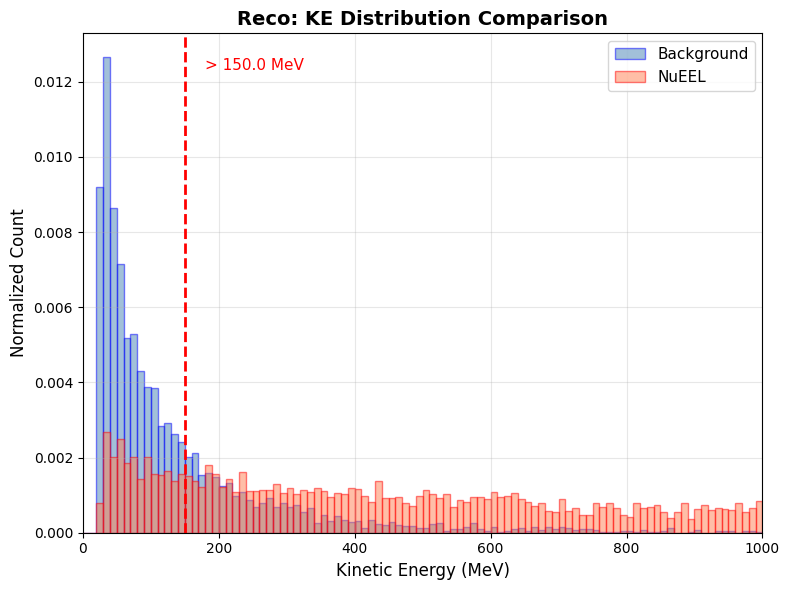

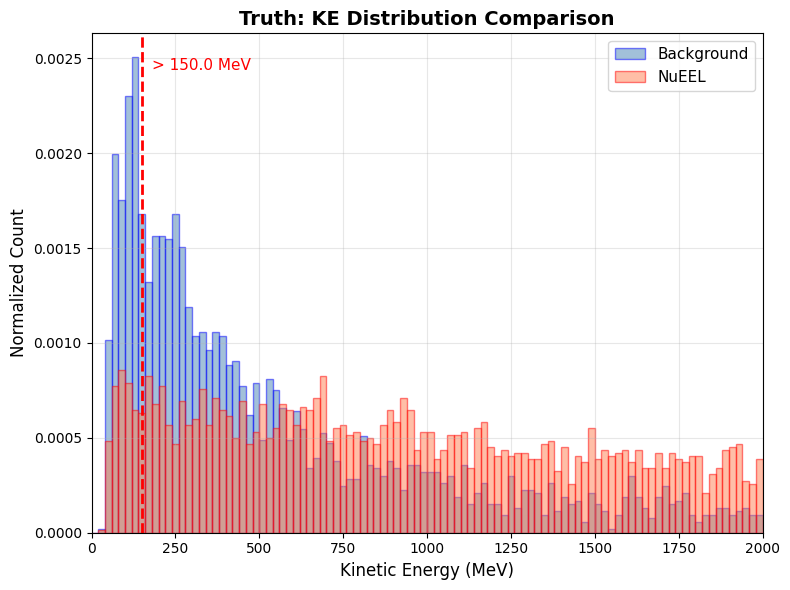

KINETIC ENERGY DISTRIBUTION STATISTICS

Reco - Full Spill: n=3926
  Mean: 189.08 MeV, Median: 87.08 MeV, Std: 399.09 MeV

Reco - NuONE: n=4863
  Mean: 955.90 MeV, Median: 602.71 MeV, Std: 1102.11 MeV

Truth - Full Spill: n=3936
  Mean: 3727.45 MeV, Median: 729.96 MeV, Std: 7479.92 MeV

Truth - NuONE: n=4863
  Mean: 2367.84 MeV, Median: 1441.48 MeV, Std: 3167.62 MeV


In [9]:
# Load KE data
ke_full_reco = pd.read_csv(f'{data_dir}/full_spill_ke_reco.csv')['ke_reco'].values
ke_full_truth = pd.read_csv(f'{data_dir}/full_spill_ke_truth.csv')['ke_truth'].values
ke_nuone_reco = pd.read_csv(f'{data_dir}/nuone_ke_reco.csv')['ke_reco'].values
ke_nuone_truth = pd.read_csv(f'{data_dir}/nuone_ke_truth.csv')['ke_truth'].values

# Create comparison plots
# Reco comparison
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.hist(ke_full_reco, bins=100, range=(0, 1000), alpha=0.5, density=True,
        color='steelblue', label=f'Background', edgecolor='blue')
ax.hist(ke_nuone_reco, bins=100, range=(0, 1000), alpha=0.5, density=True,
        color='coral', label=f'NuEEL', edgecolor='red')
ax.axvline(KE_CUT_MIN, color='red', linestyle='--', linewidth=2)
ax.text(KE_CUT_MIN + 30, ax.get_ylim()[1] * 0.95, f'> {KE_CUT_MIN} MeV', 
        color='red', fontsize=11, verticalalignment='top')
ax.set_xlabel('Kinetic Energy (MeV)', fontsize=12)
ax.set_ylabel('Normalized Count', fontsize=12)
ax.set_title('Reco: KE Distribution Comparison', fontsize=14, fontweight='bold')
ax.set_xlim(0, 1000)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Truth comparison
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.hist(ke_full_truth, bins=100, range=(0, 2000), alpha=0.5, density=True,
        color='steelblue', label='Background', edgecolor='blue')
ax.hist(ke_nuone_truth, bins=100, range=(0, 2000), alpha=0.5, density=True,
        color='coral', label='NuEEL', edgecolor='red')
ax.axvline(KE_CUT_MIN, color='red', linestyle='--', linewidth=2)
ax.text(KE_CUT_MIN + 30, ax.get_ylim()[1] * 0.95, f'> {KE_CUT_MIN} MeV', 
        color='red', fontsize=11, verticalalignment='top')
ax.set_xlabel('Kinetic Energy (MeV)', fontsize=12)
ax.set_ylabel('Normalized Count', fontsize=12)
ax.set_title('Truth: KE Distribution Comparison', fontsize=14, fontweight='bold')
ax.set_xlim(0, 2000)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print statistics
print("=" * 80)
print("KINETIC ENERGY DISTRIBUTION STATISTICS")
print("=" * 80)
print(f"\nReco - Full Spill: n={len(ke_full_reco)}")
print(f"  Mean: {np.mean(ke_full_reco):.2f} MeV, Median: {np.median(ke_full_reco):.2f} MeV, Std: {np.std(ke_full_reco):.2f} MeV")
print(f"\nReco - NuONE: n={len(ke_nuone_reco)}")
print(f"  Mean: {np.mean(ke_nuone_reco):.2f} MeV, Median: {np.median(ke_nuone_reco):.2f} MeV, Std: {np.std(ke_nuone_reco):.2f} MeV")
print(f"\nTruth - Full Spill: n={len(ke_full_truth)}")
print(f"  Mean: {np.mean(ke_full_truth):.2f} MeV, Median: {np.median(ke_full_truth):.2f} MeV, Std: {np.std(ke_full_truth):.2f} MeV")

print(f"\nTruth - NuONE: n={len(ke_nuone_truth)}")
print("=" * 80)
print(f"  Mean: {np.mean(ke_nuone_truth):.2f} MeV, Median: {np.median(ke_nuone_truth):.2f} MeV, Std: {np.std(ke_nuone_truth):.2f} MeV")

## Cut 7: PCA Distribution Comparison

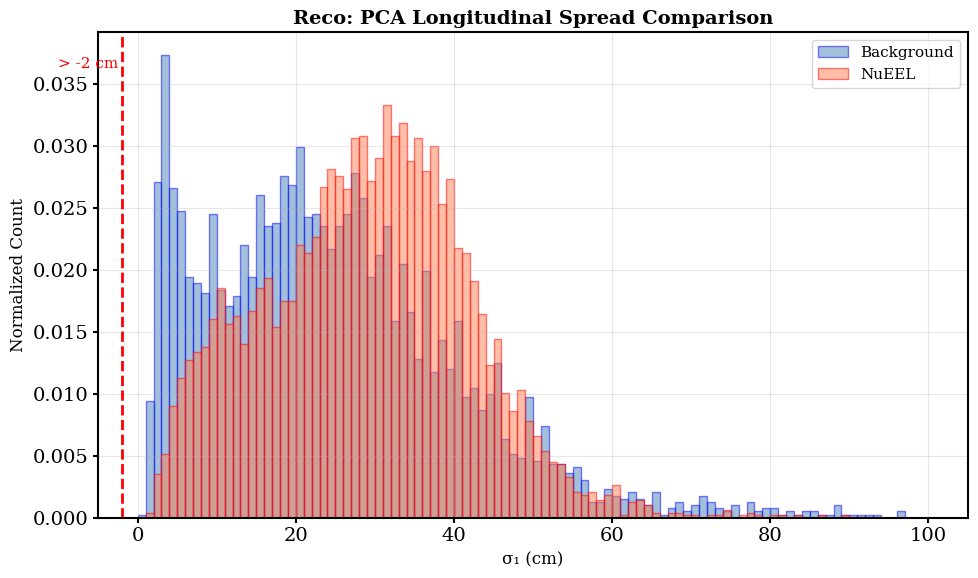

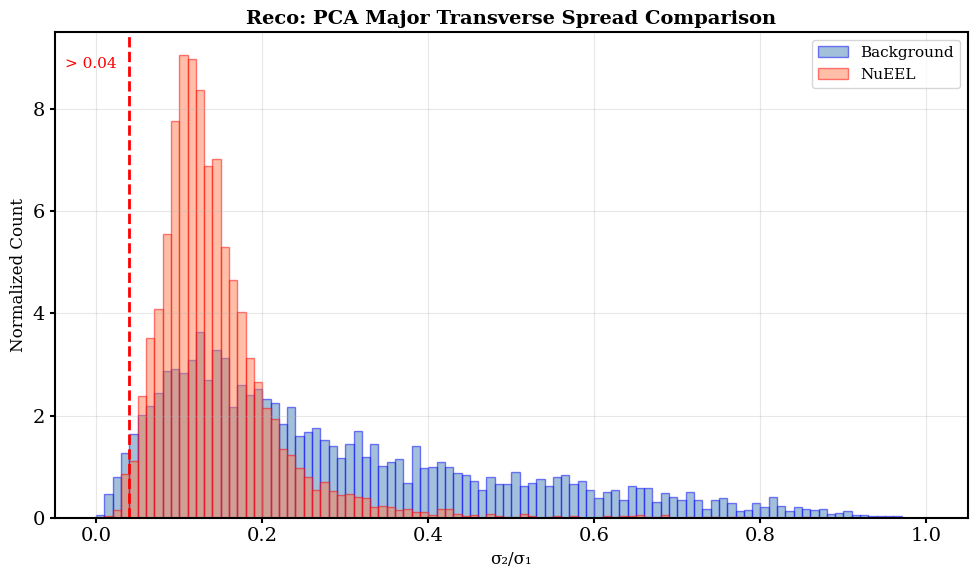

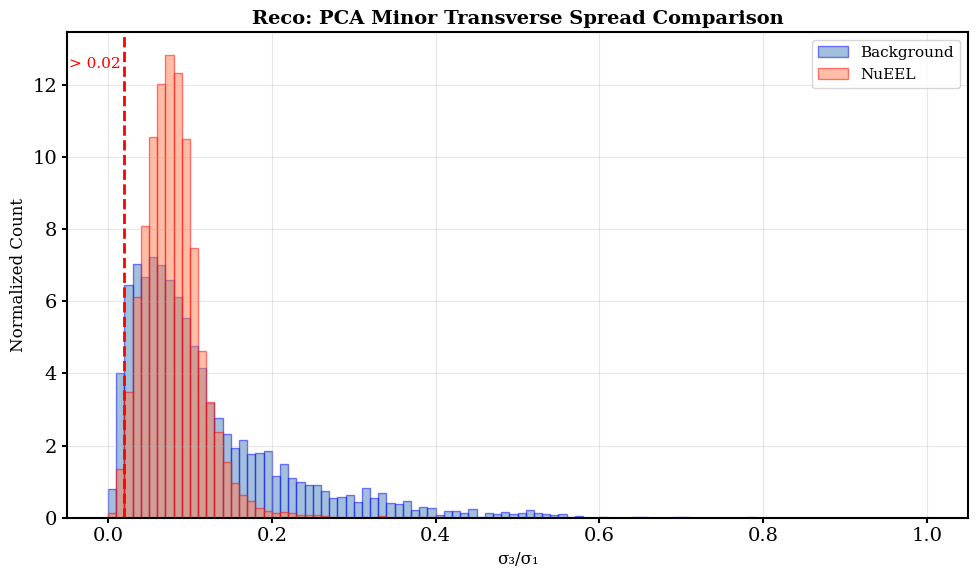

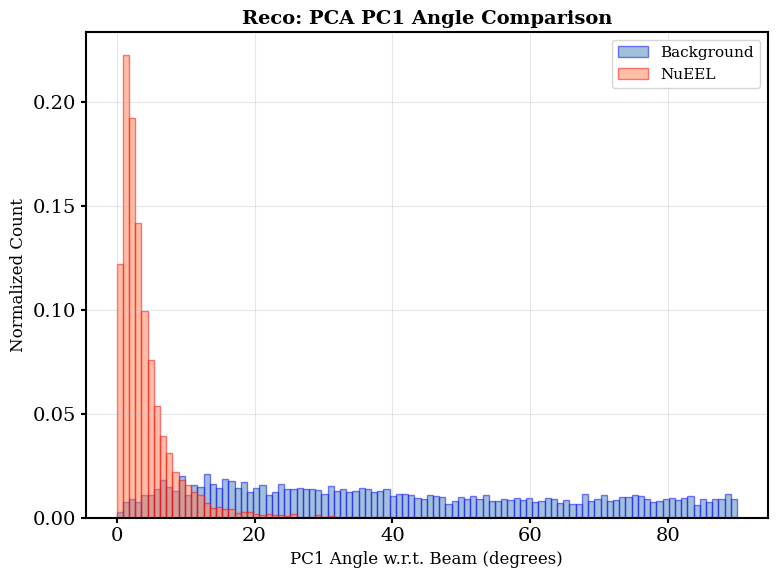

RECO PCA DISTRIBUTION STATISTICS

Full Spill (n=3926):
  Longitudinal: Mean=24.89 cm, Std=16.82 cm
  Trans Major: Mean=0.285, Std=0.204
  Trans Minor: Mean=0.118, Std=0.100
  PC1 Angle: Mean=40.59°, Std=25.41°
  Trans Major: Mean=0.144, Std=0.077
  Trans Minor: Mean=0.080, Std=0.036
  PC1 Angle: Mean=4.34°, Std=5.64°
  PC1 Angle: Mean=4.34°, Std=5.64°


In [19]:
# Load PCA data
pca_full_reco = pd.read_csv(f'{data_dir}/full_spill_pca_reco.csv')
pca_full_truth = pd.read_csv(f'{data_dir}/full_spill_pca_truth.csv')
pca_nuone_reco = pd.read_csv(f'{data_dir}/nuone_pca_reco.csv')
pca_nuone_truth = pd.read_csv(f'{data_dir}/nuone_pca_truth.csv')

# Create comparison plots - Reco
# Longitudinal spread
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.hist(pca_full_reco['longitudinal_reco'], bins=100, range=(0, 100), alpha=0.5, density=True,
        color='steelblue', label='Background', edgecolor='blue')
ax.hist(pca_nuone_reco['longitudinal_reco'], bins=100, range=(0, 100), alpha=0.5, density=True,
        color='coral', label='NuEEL', edgecolor='red')
ax.axvline(PCA_LONGITUDINAL_MIN, color='red', linestyle='--', linewidth=2)
#ax.axvline(PCA_LONGITUDINAL_MAX, color='red', linestyle='--', linewidth=2)
ax.text(PCA_LONGITUDINAL_MIN - 0.5, ax.get_ylim()[1] * 0.95, f'> {PCA_LONGITUDINAL_MIN} cm', 
        color='red', fontsize=11, verticalalignment='top', horizontalalignment='right')
#ax.text(PCA_LONGITUDINAL_MAX + 1.5, ax.get_ylim()[1] * 0.95, f'< {PCA_LONGITUDINAL_MAX} cm', 
        #color='red', fontsize=11, verticalalignment='top')
ax.set_xlabel('σ₁ (cm)', fontsize=12)
ax.set_ylabel('Normalized Count', fontsize=12)
ax.set_title('Reco: PCA Longitudinal Spread Comparison', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Major transverse spread
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.hist(pca_full_reco['transverse_major_reco'], bins=100, range=(0, 1), alpha=0.5, density=True,
        color='steelblue', label='Background', edgecolor='blue')
ax.hist(pca_nuone_reco['transverse_major_reco'], bins=100, range=(0, 1), alpha=0.5, density=True,
        color='coral', label='NuEEL', edgecolor='red')
ax.axvline(PCA_TRANSVERSE_MAJOR_MIN, color='red', linestyle='--', linewidth=2)
#ax.axvline(PCA_TRANSVERSE_MAJOR_MAX, color='red', linestyle='--', linewidth=2)
ax.text(PCA_TRANSVERSE_MAJOR_MIN - 0.015, ax.get_ylim()[1] * 0.95, f'> {PCA_TRANSVERSE_MAJOR_MIN}', 
        color='red', fontsize=11, verticalalignment='top', horizontalalignment='right')
#ax.text(PCA_TRANSVERSE_MAJOR_MAX + 0.015, ax.get_ylim()[1] * 0.95, f'< {PCA_TRANSVERSE_MAJOR_MAX}', 
        #color='red', fontsize=11, verticalalignment='top')
ax.set_xlabel('σ₂/σ₁', fontsize=12)
ax.set_ylabel('Normalized Count', fontsize=12)
ax.set_title('Reco: PCA Major Transverse Spread Comparison', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Minor transverse spread
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.hist(pca_full_reco['transverse_minor_reco'], bins=100, range=(0, 1), alpha=0.5, density=True,
        color='steelblue', label='Background', edgecolor='blue')
ax.hist(pca_nuone_reco['transverse_minor_reco'], bins=100, range=(0, 1), alpha=0.5, density=True,
        color='coral', label='NuEEL', edgecolor='red')
ax.axvline(PCA_TRANSVERSE_MINOR_MIN, color='red', linestyle='--', linewidth=2)
#ax.axvline(PCA_TRANSVERSE_MINOR_MAX, color='red', linestyle='--', linewidth=2)
ax.text(PCA_TRANSVERSE_MINOR_MIN - 0.004, ax.get_ylim()[1] * 0.95, f'> {PCA_TRANSVERSE_MINOR_MIN}', 
        color='red', fontsize=11, verticalalignment='top', horizontalalignment='right')
#ax.text(PCA_TRANSVERSE_MINOR_MAX + 0.008, ax.get_ylim()[1] * 0.95, f'< {PCA_TRANSVERSE_MINOR_MAX}', 
        #color='red', fontsize=11, verticalalignment='top')
ax.set_xlabel('σ₃/σ₁', fontsize=12)
ax.set_ylabel('Normalized Count', fontsize=12)
ax.set_title('Reco: PCA Minor Transverse Spread Comparison', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# PC1 angle
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.hist(pca_full_reco['pc1_angle_reco'], bins=100, range=(0, 90), alpha=0.5, density=True,
        color='steelblue', label='Background', edgecolor='blue')
ax.hist(pca_nuone_reco['pc1_angle_reco'], bins=100, range=(0, 90), alpha=0.5, density=True,
        color='coral', label='NuEEL', edgecolor='red')
ax.set_xlabel('PC1 Angle w.r.t. Beam (degrees)', fontsize=12)
ax.set_ylabel('Normalized Count', fontsize=12)
ax.set_title('Reco: PCA PC1 Angle Comparison', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print statistics
print("=" * 80)
print("RECO PCA DISTRIBUTION STATISTICS")
print("=" * 80)
print(f"\nFull Spill (n={len(pca_full_reco)}):")
print(f"  Longitudinal: Mean={np.mean(pca_full_reco['longitudinal_reco']):.2f} cm, Std={np.std(pca_full_reco['longitudinal_reco']):.2f} cm")
print(f"  Trans Major: Mean={np.mean(pca_full_reco['transverse_major_reco']):.3f}, Std={np.std(pca_full_reco['transverse_major_reco']):.3f}")
print(f"  Trans Minor: Mean={np.mean(pca_full_reco['transverse_minor_reco']):.3f}, Std={np.std(pca_full_reco['transverse_minor_reco']):.3f}")
print(f"  PC1 Angle: Mean={np.mean(pca_full_reco['pc1_angle_reco']):.2f}°, Std={np.std(pca_full_reco['pc1_angle_reco']):.2f}°")
print(f"  Trans Major: Mean={np.mean(pca_nuone_reco['transverse_major_reco']):.3f}, Std={np.std(pca_nuone_reco['transverse_major_reco']):.3f}")
print(f"  Trans Minor: Mean={np.mean(pca_nuone_reco['transverse_minor_reco']):.3f}, Std={np.std(pca_nuone_reco['transverse_minor_reco']):.3f}")
print(f"  PC1 Angle: Mean={np.mean(pca_nuone_reco['pc1_angle_reco']):.2f}°, Std={np.std(pca_nuone_reco['pc1_angle_reco']):.2f}°")
print("=" * 80)

print(f"  PC1 Angle: Mean={np.mean(pca_nuone_reco['pc1_angle_reco']):.2f}°, Std={np.std(pca_nuone_reco['pc1_angle_reco']):.2f}°")
print("=" * 80)

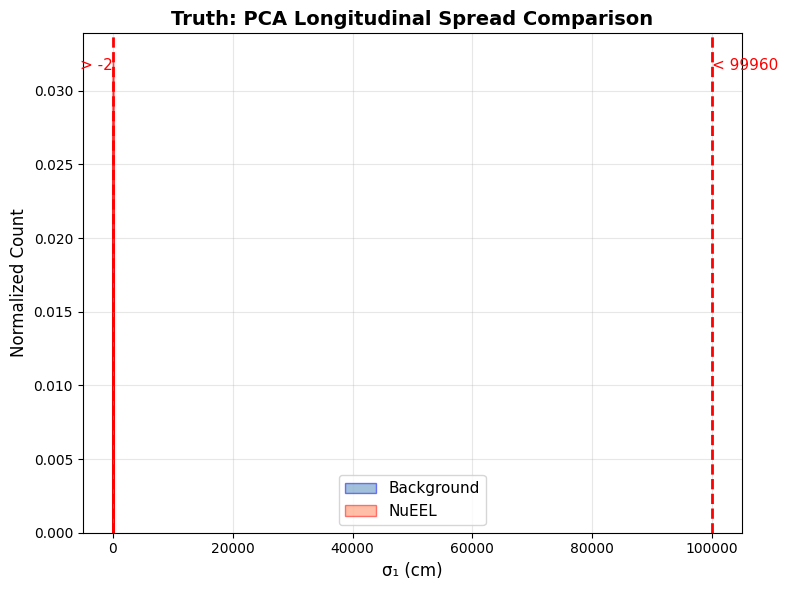

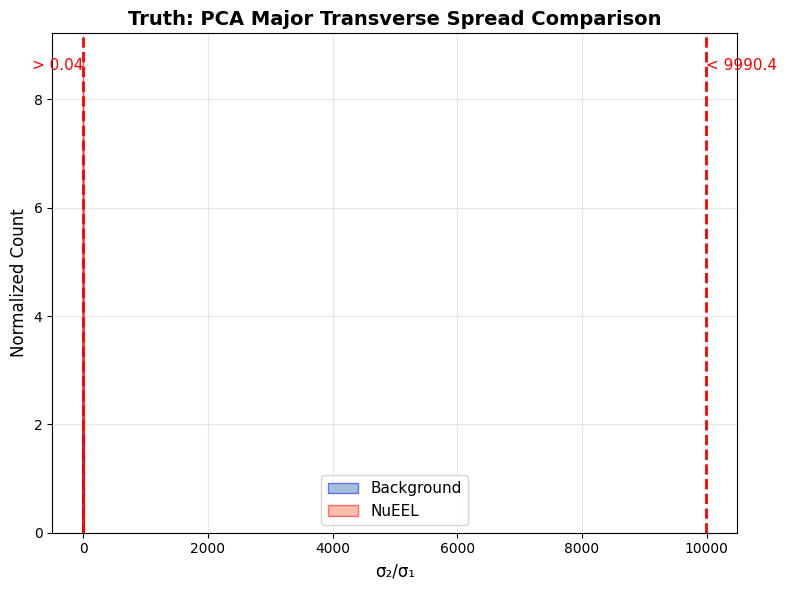

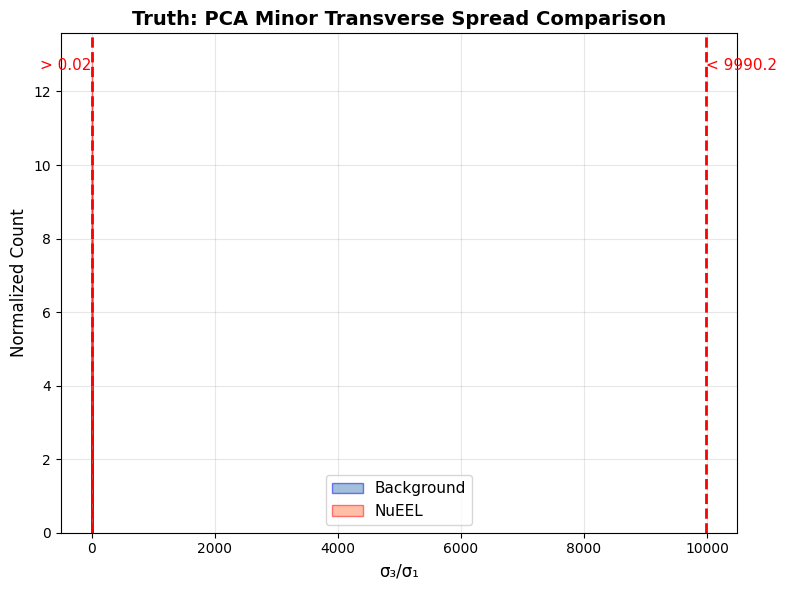

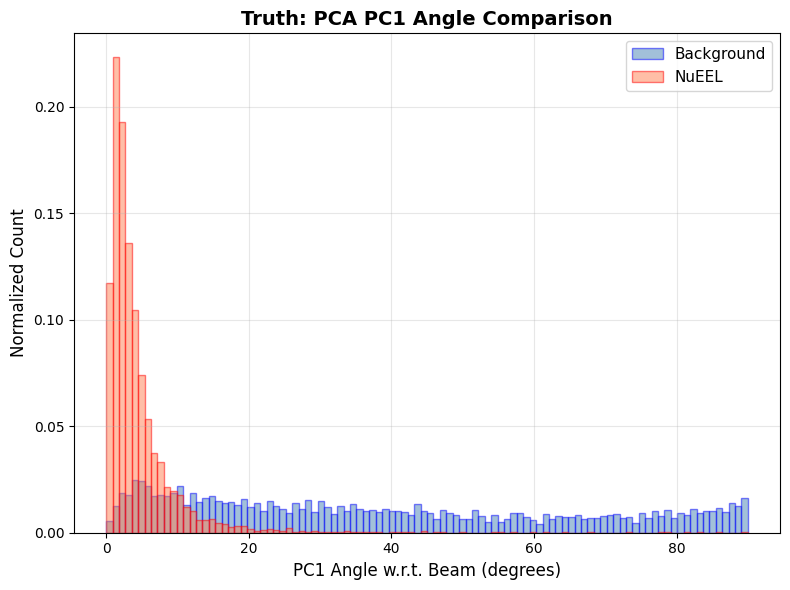

TRUTH PCA DISTRIBUTION STATISTICS

Full Spill (n=3926):
  Longitudinal: Mean=60.79 cm, Std=45.81 cm
  Trans Major: Mean=0.351, Std=0.220
  Trans Minor: Mean=0.154, Std=0.133
  PC1 Angle: Mean=38.62°, Std=27.25°
  Trans Major: Mean=0.147, Std=0.081
  Trans Minor: Mean=0.080, Std=0.037
  PC1 Angle: Mean=4.48°, Std=6.04°
  PC1 Angle: Mean=4.48°, Std=6.04°


In [11]:
# Create comparison plots - Truth
# Longitudinal spread
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.hist(pca_full_truth['longitudinal_truth'], bins=100, range=(0, 100), alpha=0.5, density=True,
        color='steelblue', label='Background', edgecolor='blue')
ax.hist(pca_nuone_truth['longitudinal_truth'], bins=100, range=(0, 100), alpha=0.5, density=True,
        color='coral', label='NuEEL', edgecolor='red')
ax.axvline(PCA_LONGITUDINAL_MIN, color='red', linestyle='--', linewidth=2)
ax.axvline(PCA_LONGITUDINAL_MAX, color='red', linestyle='--', linewidth=2)
ax.text(PCA_LONGITUDINAL_MIN - 1.5, ax.get_ylim()[1] * 0.95, f'> {PCA_LONGITUDINAL_MIN}', 
        color='red', fontsize=11, verticalalignment='top', horizontalalignment='right')
ax.text(PCA_LONGITUDINAL_MAX + 1.5, ax.get_ylim()[1] * 0.95, f'< {PCA_LONGITUDINAL_MAX}', 
        color='red', fontsize=11, verticalalignment='top')
ax.set_xlabel('σ₁ (cm)', fontsize=12)
ax.set_ylabel('Normalized Count', fontsize=12)
ax.set_title('Truth: PCA Longitudinal Spread Comparison', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Major transverse spread
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.hist(pca_full_truth['transverse_major_truth'], bins=100, range=(0, 1), alpha=0.5, density=True,
        color='steelblue', label='Background', edgecolor='blue')
ax.hist(pca_nuone_truth['transverse_major_truth'], bins=100, range=(0, 1), alpha=0.5, density=True,
        color='coral', label='NuEEL', edgecolor='red')
ax.axvline(PCA_TRANSVERSE_MAJOR_MIN, color='red', linestyle='--', linewidth=2)
ax.axvline(PCA_TRANSVERSE_MAJOR_MAX, color='red', linestyle='--', linewidth=2)
ax.text(PCA_TRANSVERSE_MAJOR_MIN - 0.015, ax.get_ylim()[1] * 0.95, f'> {PCA_TRANSVERSE_MAJOR_MIN}', 
        color='red', fontsize=11, verticalalignment='top', horizontalalignment='right')
ax.text(PCA_TRANSVERSE_MAJOR_MAX + 0.015, ax.get_ylim()[1] * 0.95, f'< {PCA_TRANSVERSE_MAJOR_MAX}', 
        color='red', fontsize=11, verticalalignment='top')
ax.set_xlabel('σ₂/σ₁', fontsize=12)
ax.set_ylabel('Normalized Count', fontsize=12)
ax.set_title('Truth: PCA Major Transverse Spread Comparison', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Minor transverse spread
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.hist(pca_full_truth['transverse_minor_truth'], bins=100, range=(0, 1), alpha=0.5, density=True,
        color='steelblue', label='Background', edgecolor='blue')
ax.hist(pca_nuone_truth['transverse_minor_truth'], bins=100, range=(0, 1), alpha=0.5, density=True,
        color='coral', label='NuEEL', edgecolor='red')
ax.axvline(PCA_TRANSVERSE_MINOR_MIN, color='red', linestyle='--', linewidth=2)
ax.axvline(PCA_TRANSVERSE_MINOR_MAX, color='red', linestyle='--', linewidth=2)
ax.text(PCA_TRANSVERSE_MINOR_MIN - 0.008, ax.get_ylim()[1] * 0.95, f'> {PCA_TRANSVERSE_MINOR_MIN}', 
        color='red', fontsize=11, verticalalignment='top', horizontalalignment='right')
ax.text(PCA_TRANSVERSE_MINOR_MAX + 0.008, ax.get_ylim()[1] * 0.95, f'< {PCA_TRANSVERSE_MINOR_MAX}', 
        color='red', fontsize=11, verticalalignment='top')
ax.set_xlabel('σ₃/σ₁', fontsize=12)
ax.set_ylabel('Normalized Count', fontsize=12)
ax.set_title('Truth: PCA Minor Transverse Spread Comparison', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# PC1 angle
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.hist(pca_full_truth['pc1_angle_truth'], bins=100, range=(0, 90), alpha=0.5, density=True,
        color='steelblue', label='Background', edgecolor='blue')
ax.hist(pca_nuone_truth['pc1_angle_truth'], bins=100, range=(0, 90), alpha=0.5, density=True,
        color='coral', label='NuEEL', edgecolor='red')
ax.set_xlabel('PC1 Angle w.r.t. Beam (degrees)', fontsize=12)
ax.set_ylabel('Normalized Count', fontsize=12)
ax.set_title('Truth: PCA PC1 Angle Comparison', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print statistics
print("=" * 80)
print("TRUTH PCA DISTRIBUTION STATISTICS")
print("=" * 80)
print(f"\nFull Spill (n={len(pca_full_truth)}):")
print(f"  Longitudinal: Mean={np.mean(pca_full_truth['longitudinal_truth']):.2f} cm, Std={np.std(pca_full_truth['longitudinal_truth']):.2f} cm")
print(f"  Trans Major: Mean={np.mean(pca_full_truth['transverse_major_truth']):.3f}, Std={np.std(pca_full_truth['transverse_major_truth']):.3f}")
print(f"  Trans Minor: Mean={np.mean(pca_full_truth['transverse_minor_truth']):.3f}, Std={np.std(pca_full_truth['transverse_minor_truth']):.3f}")
print(f"  PC1 Angle: Mean={np.mean(pca_full_truth['pc1_angle_truth']):.2f}°, Std={np.std(pca_full_truth['pc1_angle_truth']):.2f}°")
print(f"  Trans Major: Mean={np.mean(pca_nuone_truth['transverse_major_truth']):.3f}, Std={np.std(pca_nuone_truth['transverse_major_truth']):.3f}")
print(f"  Trans Minor: Mean={np.mean(pca_nuone_truth['transverse_minor_truth']):.3f}, Std={np.std(pca_nuone_truth['transverse_minor_truth']):.3f}")
print(f"  PC1 Angle: Mean={np.mean(pca_nuone_truth['pc1_angle_truth']):.2f}°, Std={np.std(pca_nuone_truth['pc1_angle_truth']):.2f}°")
print("=" * 80)

print(f"  PC1 Angle: Mean={np.mean(pca_nuone_truth['pc1_angle_truth']):.2f}°, Std={np.std(pca_nuone_truth['pc1_angle_truth']):.2f}°")
print("=" * 80)

## Comparison: Particle Angle vs PCA PC1 Angle (NuONE Data)

Comparing two different angle measurements to evaluate which provides better discrimination:
- **Particle Angle**: Angle of individual particles w.r.t. beam direction (from Cut 3)
- **PCA PC1 Angle**: Angle of principal component 1 w.r.t. beam direction (from Cut 7)

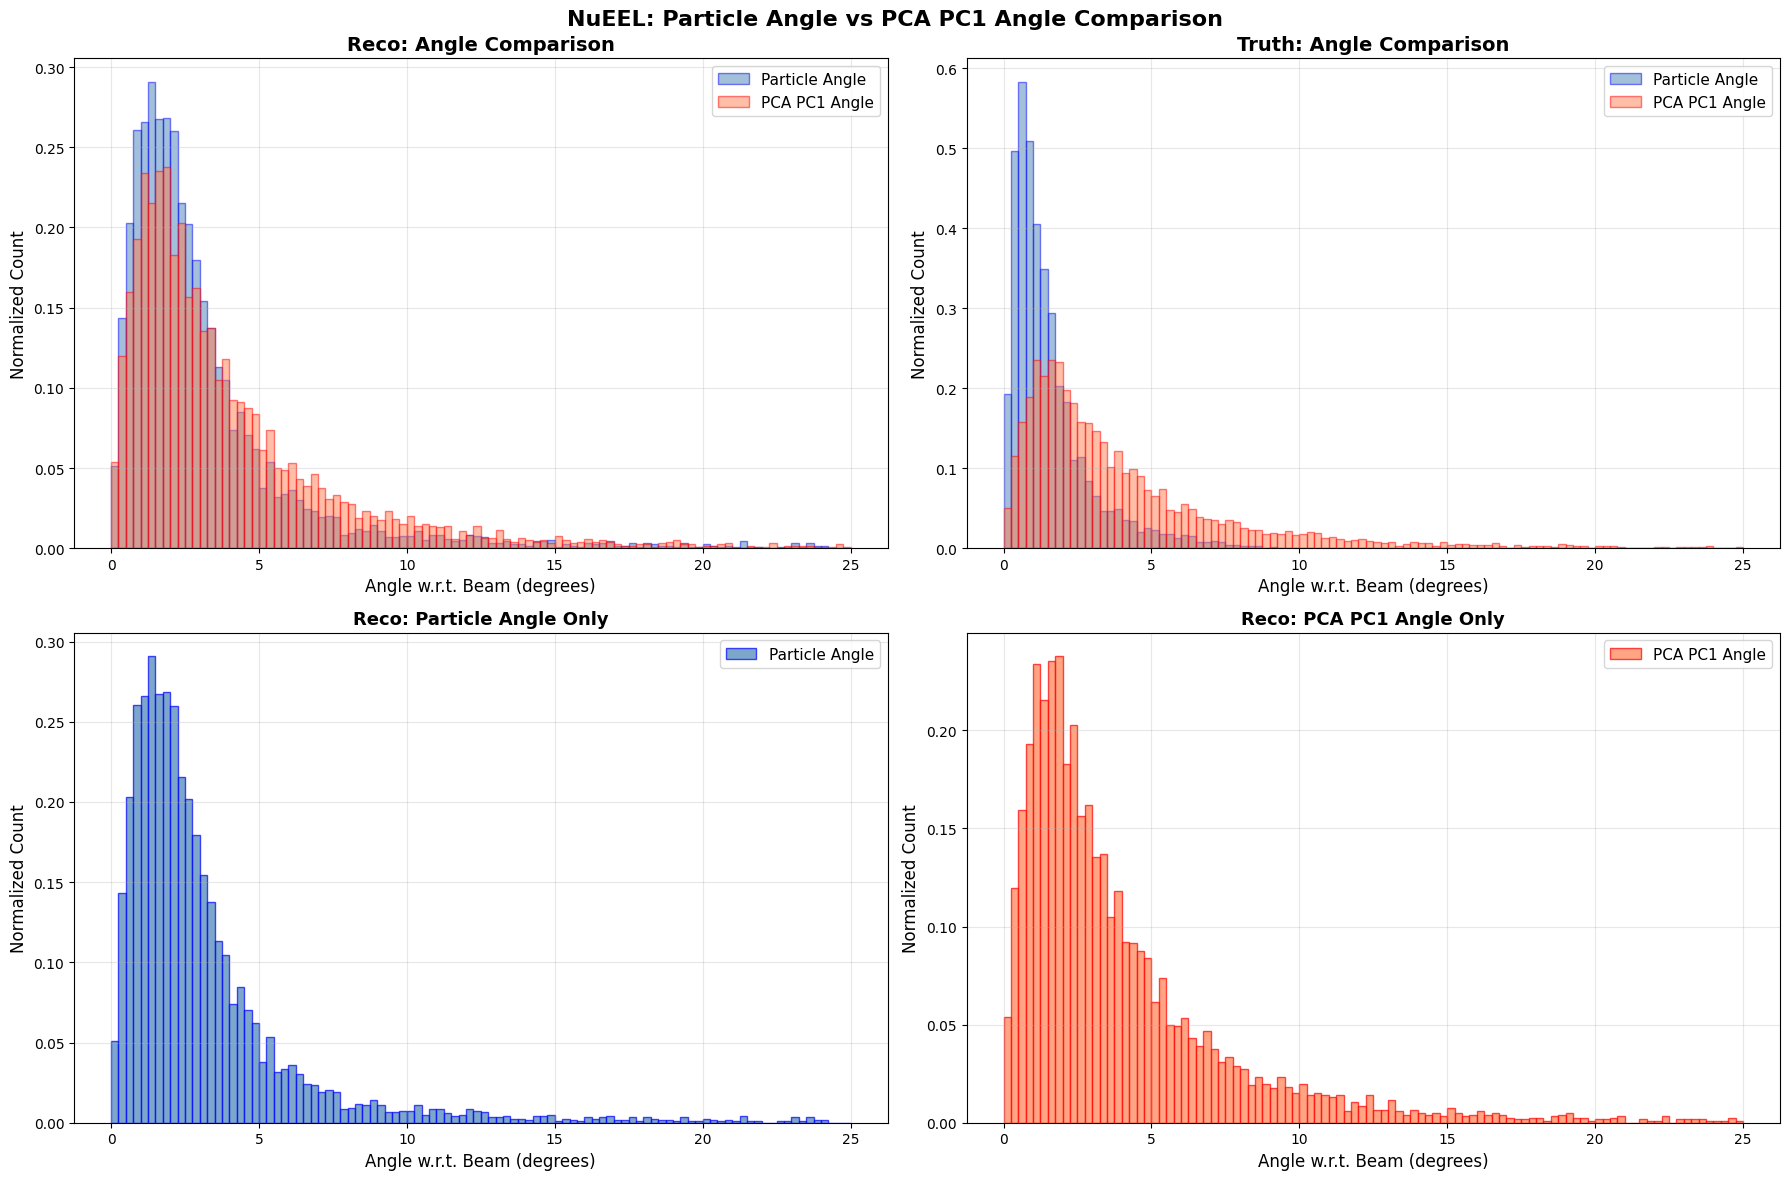

NUONE ANGLE COMPARISON: Particle Angle vs PCA PC1 Angle

RECO - Particle Angle:
  Sample size: 4863
  Mean: 4.16°, Median: 2.28°
  Std Dev: 9.14°
  Range: [0.03°, 169.14°]
  Percentiles (25%, 50%, 75%): [1.33370634 2.28350001 3.8551533 ]

RECO - PCA PC1 Angle:
  Sample size: 4863
  Mean: 4.34°, Median: 2.80°
  Std Dev: 5.64°
  Range: [0.03°, 89.84°]
  Percentiles (25%, 50%, 75%): [1.53160279 2.80020331 5.13302303]

TRUTH - Particle Angle:
  Sample size: 4863
  Mean: 1.55°, Median: 1.13°
  Std Dev: 1.39°
  Range: [0.02°, 9.54°]
  Percentiles (25%, 50%, 75%): [0.63126858 1.1273608  1.9588044 ]

TRUTH - PCA PC1 Angle:
  Sample size: 4863
  Mean: 4.48°, Median: 2.84°
  Std Dev: 6.04°
  Range: [0.03°, 89.84°]
  Percentiles (25%, 50%, 75%): [1.556701   2.83521019 5.22231729]

KEY OBSERVATIONS:
1. Distribution Shape: Compare the peak positions and spread
2. Dynamic Range: Particle angle covers 0-25°, PCA angle typically 0-25°
3. Discrimination Power: Narrower distribution may provide better c

In [12]:
# Compare Particle Angle vs PCA PC1 Angle using NuONE data
import matplotlib.pyplot as plt
import numpy as np

# Get the data
particle_angle_nuone_reco = angle_nuone_reco  # Already loaded from Cut 3
particle_angle_nuone_truth = angle_nuone_truth
pca_angle_nuone_reco = pca_nuone_reco['pc1_angle_reco'].values  # From Cut 7
pca_angle_nuone_truth = pca_nuone_truth['pc1_angle_truth'].values

# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('NuEEL: Particle Angle vs PCA PC1 Angle Comparison', fontsize=16, fontweight='bold')

# Reco - Overlaid histograms
ax = axes[0, 0]
ax.hist(particle_angle_nuone_reco, bins=100, range=(0, 25), alpha=0.5, density=True,
        color='steelblue', label='Particle Angle', edgecolor='blue')
ax.hist(pca_angle_nuone_reco, bins=100, range=(0, 25), alpha=0.5, density=True,
        color='coral', label='PCA PC1 Angle', edgecolor='red')
ax.set_xlabel('Angle w.r.t. Beam (degrees)', fontsize=12)
ax.set_ylabel('Normalized Count', fontsize=12)
ax.set_title('Reco: Angle Comparison', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Truth - Overlaid histograms
ax = axes[0, 1]
ax.hist(particle_angle_nuone_truth, bins=100, range=(0, 25), alpha=0.5, density=True,
        color='steelblue', label='Particle Angle', edgecolor='blue')
ax.hist(pca_angle_nuone_truth, bins=100, range=(0, 25), alpha=0.5, density=True,
        color='coral', label='PCA PC1 Angle', edgecolor='red')
ax.set_xlabel('Angle w.r.t. Beam (degrees)', fontsize=12)
ax.set_ylabel('Normalized Count', fontsize=12)
ax.set_title('Truth: Angle Comparison', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Reco - Side by side
ax = axes[1, 0]
ax.hist(particle_angle_nuone_reco, bins=100, range=(0, 25), alpha=0.7, density=True,
        color='steelblue', label='Particle Angle', edgecolor='blue')
ax.set_xlabel('Angle w.r.t. Beam (degrees)', fontsize=12)
ax.set_ylabel('Normalized Count', fontsize=12)
ax.set_title('Reco: Particle Angle Only', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Reco - PCA angle only
ax = axes[1, 1]
ax.hist(pca_angle_nuone_reco, bins=100, range=(0, 25), alpha=0.7, density=True,
        color='coral', label='PCA PC1 Angle', edgecolor='red')
ax.set_xlabel('Angle w.r.t. Beam (degrees)', fontsize=12)
ax.set_ylabel('Normalized Count', fontsize=12)
ax.set_title('Reco: PCA PC1 Angle Only', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("=" * 80)
print("NUONE ANGLE COMPARISON: Particle Angle vs PCA PC1 Angle")
print("=" * 80)
print("\nRECO - Particle Angle:")
print(f"  Sample size: {len(particle_angle_nuone_reco)}")
print(f"  Mean: {np.mean(particle_angle_nuone_reco):.2f}°, Median: {np.median(particle_angle_nuone_reco):.2f}°")
print(f"  Std Dev: {np.std(particle_angle_nuone_reco):.2f}°")
print(f"  Range: [{np.min(particle_angle_nuone_reco):.2f}°, {np.max(particle_angle_nuone_reco):.2f}°]")
print(f"  Percentiles (25%, 50%, 75%): {np.percentile(particle_angle_nuone_reco, [25, 50, 75])}")

print("\nRECO - PCA PC1 Angle:")
print(f"  Sample size: {len(pca_angle_nuone_reco)}")
print(f"  Mean: {np.mean(pca_angle_nuone_reco):.2f}°, Median: {np.median(pca_angle_nuone_reco):.2f}°")
print(f"  Std Dev: {np.std(pca_angle_nuone_reco):.2f}°")
print(f"  Range: [{np.min(pca_angle_nuone_reco):.2f}°, {np.max(pca_angle_nuone_reco):.2f}°]")
print(f"  Percentiles (25%, 50%, 75%): {np.percentile(pca_angle_nuone_reco, [25, 50, 75])}")

print("\nTRUTH - Particle Angle:")
print(f"  Sample size: {len(particle_angle_nuone_truth)}")
print(f"  Mean: {np.mean(particle_angle_nuone_truth):.2f}°, Median: {np.median(particle_angle_nuone_truth):.2f}°")
print(f"  Std Dev: {np.std(particle_angle_nuone_truth):.2f}°")
print(f"  Range: [{np.min(particle_angle_nuone_truth):.2f}°, {np.max(particle_angle_nuone_truth):.2f}°]")
print(f"  Percentiles (25%, 50%, 75%): {np.percentile(particle_angle_nuone_truth, [25, 50, 75])}")

print("\nTRUTH - PCA PC1 Angle:")
print(f"  Sample size: {len(pca_angle_nuone_truth)}")
print(f"  Mean: {np.mean(pca_angle_nuone_truth):.2f}°, Median: {np.median(pca_angle_nuone_truth):.2f}°")
print(f"  Std Dev: {np.std(pca_angle_nuone_truth):.2f}°")
print(f"  Range: [{np.min(pca_angle_nuone_truth):.2f}°, {np.max(pca_angle_nuone_truth):.2f}°]")
print(f"  Percentiles (25%, 50%, 75%): {np.percentile(pca_angle_nuone_truth, [25, 50, 75])}")

print("\n" + "=" * 80)
print("KEY OBSERVATIONS:")
print("=" * 80)
print("1. Distribution Shape: Compare the peak positions and spread")
print("2. Dynamic Range: Particle angle covers 0-25°, PCA angle typically 0-25°")
print("3. Discrimination Power: Narrower distribution may provide better cut efficiency")
print("4. Physical Meaning:")
print("   - Particle Angle: Direction of individual particle momentum")
print("   - PCA PC1 Angle: Direction of shower elongation axis")
print("=" * 80)